In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/khush/OneDrive/Desktop/codes/datasets/diabetes.csv')

In [2]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [3]:
import seaborn as sns

In [4]:
#input data
x=df.drop(['Outcome'],axis=1)
#output data
y=df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

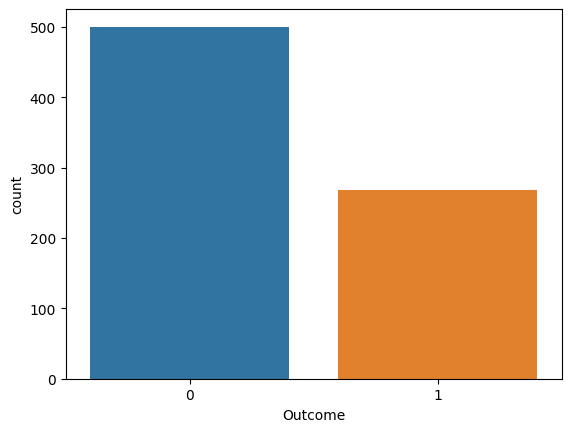

In [5]:
sns.countplot(x=y)

In [6]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
#scaling
from sklearn.preprocessing import MinMaxScaler


In [8]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [9]:
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
#cross validation
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)

In [12]:
x.shape

(768, 8)

In [13]:
x_train.shape


(576, 8)

In [14]:
x_test.shape

(192, 8)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn= KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [19]:
y_pred=knn.predict(x_test)

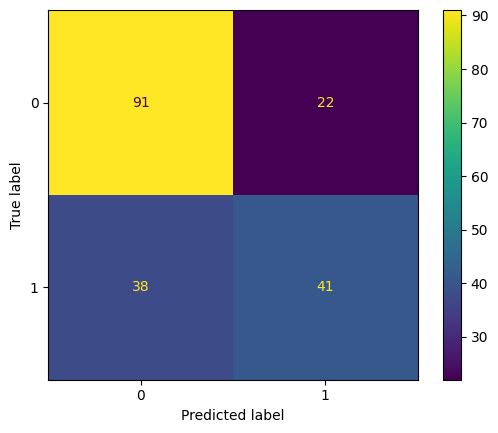

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       113
           1       0.65      0.52      0.58        79

    accuracy                           0.69       192
   macro avg       0.68      0.66      0.66       192
weighted avg       0.68      0.69      0.68       192



In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
error=[]
for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

In [24]:
error

[0.3125,
 0.3697916666666667,
 0.28125,
 0.3177083333333333,
 0.3125,
 0.3229166666666667,
 0.3072916666666667,
 0.328125,
 0.296875,
 0.296875,
 0.3229166666666667,
 0.3177083333333333,
 0.3229166666666667,
 0.3020833333333333,
 0.296875,
 0.3177083333333333,
 0.3020833333333333,
 0.3020833333333333,
 0.3072916666666667]

In [25]:
plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

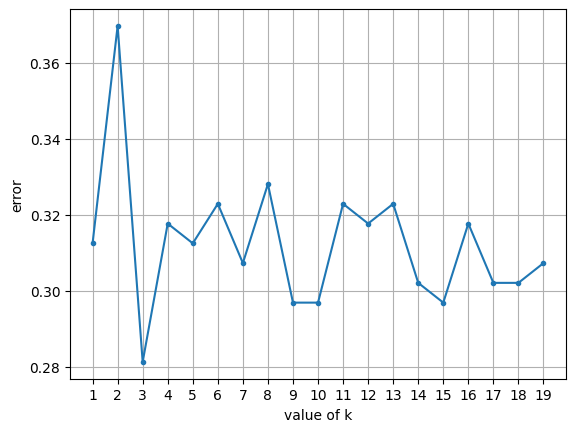

In [26]:
plt.xlabel('value of k')
plt.ylabel('error')
plt.grid()
plt.xticks(range(1,20))
plt.plot(range(1,20),error,marker='.')